# 08. 회귀트리

#### 회귀 트리 개요
+ 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 한다.
+ 리프 노드에서 예측 결정 값을 만드는 과정에서 차이가 있음
    + 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산한다.
+ 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 등의 앞 4장의 분류에서 소개한 모든 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능하다.
  + 이는 트리가 CART(Classification and Regression Tree)를 기반으로 만들어 졌기 때문이다. 이름에서 알 수 있듯이, CART는 분류 뿐만 아니라 회귀도 가능한 트리 분할 알고리즘이다.

#### 회귀 트리 프로세스

1. 기준에 따라 트리 분할
   + X값의 균일도를 반영한 지니 계수에 따라 트리 분할한다.
   + split0으 ㄹ기준으로 분할하고 이렇게 분할된 규칙 노드에서 다시 split1과 split2규칙 노드로 분할할 수 있다. 

![](https://user-images.githubusercontent.com/98722581/174007754-da54714b-430d-4f08-bbdc-e169e6684dd9.png)

2. 리프 노드에 소속된 데이터 값의 평균값을 구해서 최종적으로 리프 노드에 결정값으로 할당

![](https://user-images.githubusercontent.com/98722581/174008199-7a7991e1-812f-46dc-b57c-f25a77790c2e.png)



#### 사이킷런의 회귀 트리 지원

+ 사이킷런에서는 결정 트리, 랜덤 포레스트, GBM에서 CART 기반의 회귀 수행을 할 수 있는 Estimator 클래스를 제공한다.
+ 사이킷런의 트리 기반 회귀와 분류의 Estimator 클래스

알고리즘 | 회귀 Estimator 클래스 | 분류 Estimator 클래스
--------|----------------------|-----------------------
Decision Tree | DecisionTreeRegressor | DecisionTreeClassifier
Gradient Boosting | GradientBoostingRegressor | GradientBoostingClassifier
XGBoost | XGBRegressor | XGBClassifier
LightGBM | LGBMRegressor | LGGBMClassifier

--------------------------
#### 사이킷런의 랜덤 포레스트 회귀 트리인 RandomForestRegressor를 이용해 앞의 선형 회귀에서 다룬 보스턴 주택 가격

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


---------------------------------

#### 결정 트리, GBM, XGBoost, LightGBM의 Regressor를 모두 이용해 보스턴 주택 가격 예측을 수행

In [4]:
# get_model_cv_prediction() : 입력 모델과 데이터 세트를 입력받아 교차 검증으로 평균 RMSE를 계산
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
    
# 다양한 유형의 회귀 트리를 생성하고 이를 이용해 보스턴 주택 가격을 예측
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.251 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없다. 대신 feature_importances_ 를 이용해 피처별 중요도를 알 수 있다.

<AxesSubplot:>

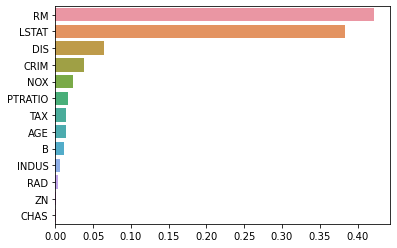

In [5]:
# feature_importances_를 이용해 보스턴 주택 가격 모델의 피처별 중요도 시각화
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

-----------------------------------
#### 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 시각화

결정 트리의 하이퍼 파라미터인 max_depth의 크기를 변화시키면서 어떻게 회귀 트리 예측선이 변호하는지 살펴본다.

2차원 평면상에서 회귀 예측선을 쉽게 표현하기 위해 단 1개의 변수만 추출한다. PRICE와 가장 밀접한 양의 상관관계를 가지는 RM 칼럼만 이용해 선형 회귀와 결정 트리 회귀로 PRICE 예측 회귀선을 표현한다.

(100, 2)


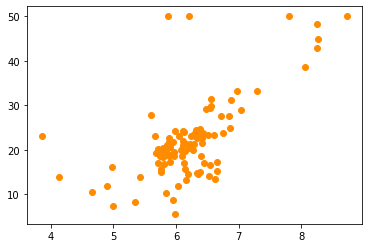

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 세트의 개수를 100개만 샘플링하고 RM과 PRICE 칼럼 추출
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)

# RM, PRICE 변수의 산점도 그리기
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

보스턴 데이터 세트에 대해 LinearREgression과 DecisionTreeRegressor를 max_depth를 각각 2,7로 해서 학습하고 RM값을 4.5~8.5까지의 100개의 테스트 데이터 세트로 제공했을 때 예측값을 구해본다.

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

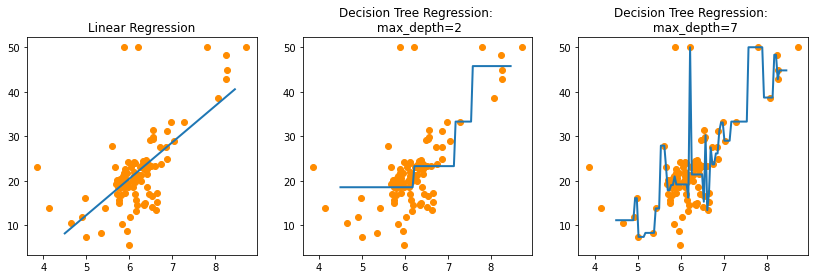

In [8]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

-----------------------

#### 회귀 트리의 오버 피팅
max_depth=7인 경우에는 학습 데이터 세트의 이상치(outlier) 데이터도 학습하면서 복잡한 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음을 볼 수 있다.

트리의 크기와 노드 개수의 제한 등의 방법을 통해 오버피팅을 개선할 수 있다.
